<a href="https://colab.research.google.com/github/ncat-morrow/isen-project-1-avatar/blob/main/ISEN_370_Project_1_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 1 Demonstration
In this demo, you will be shown how to use data science tools to build basic statistics for a Smart City Building dataset.


#Import Libraries
A Python library is a set of modules that are related. Each module contains bundles of code that can be used repeatably. It allows you program with more ease and convenience.

##Common libraries that you may need to use in this course
###numpy
NumPy stands for ‘numerical Python’ and is an open source library for Python that provides operations of multi-dimensional arrays and various mathematical functions including basic linear algebra, random simulation, Fourier transforms, trigonometric operations, and statistical operations.
NumPy is the base for libraries such as Pandas, Scikit-learn, and SciPy.

###pandas

Pandas, built on Numpy, is widely used for data science/data analysis and machine learning tasks. It is one of the most popular data wrangling packages.

###matplotlib
Matplotlib is a data visualization and graphical plotting library for Python and its numerical extension NumPy. It offers a viable open source alternative to MATLAB.

##Use of libraries
Libraries in Python is used for modularity. The mostly used functions are written in modules and can be imported in a program wherever there is a requirement.  Multiple interrelated modules are stored in a library. We can import a module from its library whenever we need to use it. In Python, the syntax is to use import.
### Examples
import numpy as np <br>
import pandas as pd <br>
import matplotlib.pyplot as plt


In project 1, you will need to use three libraries: numpy, pandas, and matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Import

In Python, you can import datasets in various format. To import a comma separated values (.csv) file, we can use read_csv() function in pandas to retrive data in the form of a dataframe.<br>
A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.<br>


Syntax: pandas.read_csv(filepath_or_buffer, sep=’ ,’ , header=’infer’,  index_col=None, usecols=None, engine=None, skiprows=None, nrows=None) <br>

Parameters: <br>

filepath_or_buffer: location of the file. It accepts any string path or URL of the file.<br><br>
sep: separator, default is ',' as in CSV(comma separated values). <br><br>
header: accepts int, a list of int, row numbers to use as the column names, and the start of the data. By default, header=None, then,  it will display the first column as 0, the second as 1, and so on.<br><br>
usecols: retrieve only selected columns from the CSV file.<br><br>
nrows: a number of rows to be displayed from the dataset.<br><br>
index_col: If None, there are no index numbers displayed along with records.  
skiprows: Skips passed rows in the new data frame.<br><br>


##Example:
data_url='https://raw.githubusercontent.com/StevenXJiang/ISEN370/main/VU_Building_Data_for_ISEN370_Spr_2020.csv?token=ATX4K2JD7Q2UQAH4KW5VFJTAPW3LQ'
<br>
data=pd.read_csv(data_url)

#Demo project

First, import the Building dataset that is stored on github and print the first 10 rows of data. The data is stored in a CSV file for which the path is given in the cell below.

##Import Data

In [2]:
data_url='https://raw.githubusercontent.com/StevenXJiang/ISEN370/main/VU_Building_Data_for_ISEN370_Spr_2020.csv?token=ATX4K2JD7Q2UQAH4KW5VFJTAPW3LQ'
data = pd.read_csv(data_url)

## Exploring Data
dataframe has a head() function that can be used to get the first n rows. By default, it will select the first 5 records.
<br>
Note we named our dataframe as data. Therefore, we will need to use data.head(10) to retrieve the first 10 rows.

In [3]:
data.head(10)

,Time,Outside Air Temperature,Outside Air Relative Humidity,Solar Irradiation,Heating Water Flow Rate,Cooling Water Flow Rate,TotalEnergy
0,5/1/2019 6:00,74.948134,45.975163,652.0,11.470796,52.921483,2368.259398
1,5/1/2019 12:00,72.712222,58.188965,40175.0,12.899331,56.676044,2492.051721
2,5/1/2019 18:00,77.303218,50.842554,28088.0,12.541347,74.263546,2780.193712
3,5/2/2019 0:00,79.858004,47.440794,147.0,7.017166,64.022101,3356.955541
4,5/2/2019 6:00,67.272050,80.017084,855.0,13.038960,51.157088,2679.355667
5,5/2/2019 12:00,65.203176,82.435819,40572.0,13.052986,63.587878,2325.858735
6,5/2/2019 18:00,77.435962,62.814544,33942.0,10.945673,82.650103,3109.230072
7,5/3/2019 0:00,80.362612,47.781727,130.0,9.204394,63.725698,3547.629259
8,5/3/2019 6:00,69.237429,71.373502,554.0,12.931123,53.722039,2893.024089
9,5/3/2019 12:00,65.904534,80.658236,21741.0,13.170321,52.877535,2542.561279


We can select specific feature columns which we are interested in more than others. This process is called feature selection and is an important part of the data analysis process as we may have data for features which are unimportant or have a negative impact on the accuracy of the model. <br>For example, in this demo project, let's try selecting information about Outside Air Temperature, Outside Air Relative Humidity, and Solar Irradiation. Note, these feature names need to be put in quotation marks.
<br>
To do so, simply specify the columns that you would like to select. Then, display the first 5 rows.

In [4]:
features = data[['Outside Air Temperature', 'Outside Air Relative Humidity', 'Solar Irradiation']]
features.head()

,Outside Air Temperature,Outside Air Relative Humidity,Solar Irradiation
0,74.948134,45.975163,652.0
1,72.712222,58.188965,40175.0
2,77.303218,50.842554,28088.0
3,79.858004,47.440794,147.0
4,67.272050,80.017084,855.0


## Statistics Calculation

It is common to explore a data set by calculating and printing some of the basic statistics for each of the features of the dataset. The common statistics include mean, range, and standard deviation.<br>
There are many ways to get the basic statistics. One simple way is to use the desribe(). <br>
### pandas.dataframe.describe()
The describe() method is used for calculating statistics such as percentile, mean and std of the numerical values of the Series or DataFrame.
### other pandas dataframe functions
	Function	Description
	count()	  Number of non-null observations
	sum()	    Sum of values
	mean()	  Mean of Values
	median()	Median of Values
	mode()	  Mode of values
	std()	    Standard Deviation of the Values
	min()	    Minimum Value
	max()	    Maximum Value
	abs()	    Absolute Value
	prod()	  Product of Values
	cumsum()	Cumulative Sum
	cumprod()	Cumulative Product

For example, to get the basic statistics for the dataframe we created for the features (we named it as features), we can use features.describe().

In [5]:
features.describe()

,Outside Air Temperature,Outside Air Relative Humidity,Solar Irradiation
count,491.000000,491.000000,491.000000
mean,77.227680,58.920863,19683.346232
std,7.880355,13.978720,20296.603728
min,48.864128,25.592493,44.000000
25%,72.426728,48.324007,630.000000
50%,77.568599,58.295772,11742.000000
75%,83.033853,70.274889,41343.051725
max,92.889009,88.612658,58728.326850


#Graphs and plots
Graphical representations are important ways to describe the data. Common tools include histogram, scatter plot, and box lot.
## Histogram Plotting
matplotlib.pyplot.hist() Function<br>
The hist() function in pyplot module of matplotlib library is used to plot a histogram.

Syntax: matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype=’bar’, align=’mid’, orientation=’vertical’, rwidth=None, log=False, color=None, label=None, stacked=False, \*, data=None, \*\*kwargs)

matplotlib.pyplot.hist() Function
The hist() function in pyplot module of matplotlib library is used to plot a histogram.

Syntax: matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype=’bar’, align=’mid’, orientation=’vertical’, rwidth=None, log=False, color=None, label=None, stacked=False, \*, data=None, \*\*kwargs)

x : This parameter are the sequence of data.<BR>
bins : This parameter is an optional parameter and it contains the integer or sequence or string.<BR>
range : This parameter is an optional parameter and it the lower and upper range of the bins.<BR>
density : This parameter is an optional parameter and it contains the boolean values.<BR>
weights : This parameter is an optional parameter and it is an array of weights, of the same shape as x.<BR>
bottom : This parameter is the location of the bottom baseline of each bin.
histtype : This parameter is an optional parameter and it is used to draw type of histogram. {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}<BR>
align : This parameter is an optional parameter and it controls how the histogram is plotted. {‘left’, ‘mid’, ‘right’}<BR>
rwidth : This parameter is an optional parameter and it is a relative width of the bars as a fraction of the bin width<BR>
log : This parameter is an optional parameter and it is used to set histogram axis to a log scale<BR>
color : This parameter is an optional parameter and it is a color spec or sequence of color specs, one per dataset.<BR>
label : This parameter is an optional parameter and it is a string, or sequence of strings to match multiple datasets.<BR>
normed : This parameter is an optional parameter and it contains the boolean values.It uses the density keyword argument instead.<BR>

Returns: This returns the following:

n :This returns the values of the histogram bins.<BR>
bins :This returns the edges of the bins.<BR>
patches :This returns the list of individual patches used to create the histogram.
# Create Histogram for the demo project

We can also plot some of these features using Pandas and Matplotlib. Lets first try plotting some histograms.
Plot a histogram for each of the features of the dataset. Be sure to include proper titles and axis labels on each of your plots.

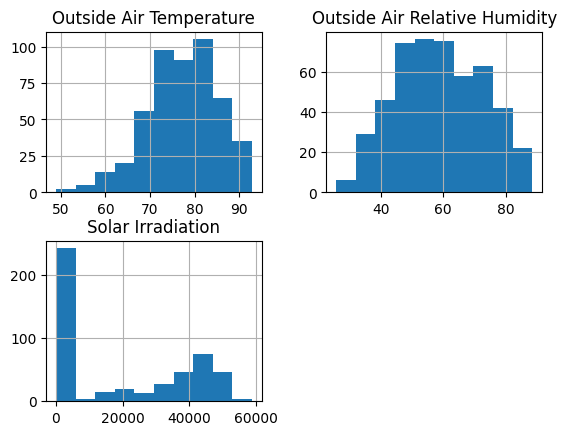

In [6]:
features.hist()
plt.show()

We can also specify a feature to plot a histogram by adding the name of the feature in the parentheses.

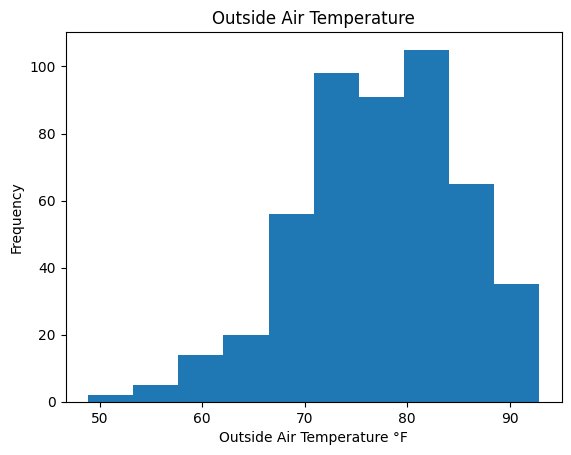

In [7]:
plt.hist(features['Outside Air Temperature'])
plt.ylabel('Frequency')
plt.xlabel("Outside Air Temperature \N{DEGREE SIGN}F")
plt.title('Outside Air Temperature')
plt.show()

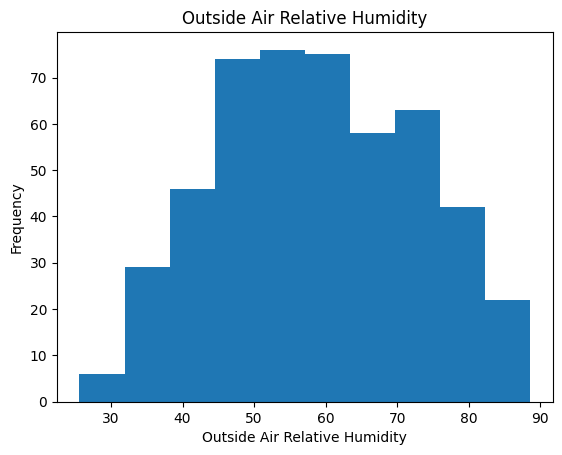

In [8]:
plt.hist(features['Outside Air Relative Humidity'])
plt.ylabel('Frequency')
plt.xlabel("Outside Air Relative Humidity")
plt.title('Outside Air Relative Humidity')
plt.show()

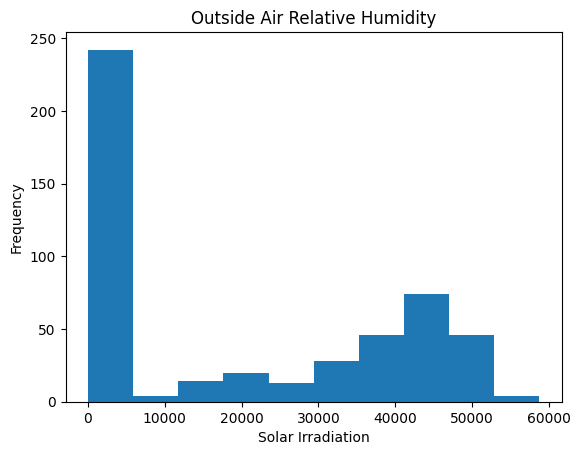

In [9]:
plt.hist(features['Solar Irradiation'])
plt.ylabel('Frequency')
plt.xlabel("Solar Irradiation")
plt.title('Outside Air Relative Humidity')
plt.show()

<b>matplotlib.pyplot.scatter() Function</b><br>
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)<br>
A scatter plot of y vs. x with varying marker size and/or color.

Parameters:
x, yfloat or array-like, shape (n, )
The data positions.

sfloat or array-like, shape (n, ), optional
The marker size in points**2 (typographic points are 1/72 in.). Default is rcParams['lines.markersize'] ** 2.

carray-like or list of colors or color, optional
The marker colors. Possible values:

A scalar or sequence of n numbers to be mapped to colors using cmap and norm.

A 2D array in which the rows are RGB or RGBA.

A sequence of colors of length n.

A single color format string.

Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. If you want to specify the same RGB or RGBA value for all points, use a 2D array with a single row. Otherwise, value- matching will have precedence in case of a size matching with x and y.

If you wish to specify a single color for all points prefer the color keyword argument.

Defaults to None. In that case the marker color is determined by the value of color, facecolor or facecolors. In case those are not specified or None, the marker color is determined by the next color of the Axes' current "shape and fill" color cycle. This cycle defaults to rcParams["axes.prop_cycle"] (default: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])).

markerMarkerStyle, default: rcParams["scatter.marker"] (default: 'o')
The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. See matplotlib.markers for more information about marker styles.

cmapstr or Colormap, default: rcParams["image.cmap"] (default: 'viridis')
The Colormap instance or registered colormap name used to map scalar data to colors.

This parameter is ignored if c is RGB(A).

normstr or Normalize, optional
The normalization method used to scale scalar data to the [0, 1] range before mapping to colors using cmap. By default, a linear scaling is used, mapping the lowest value to 0 and the highest to 1.

If given, this can be one of the following:

An instance of Normalize or one of its subclasses (see Colormap Normalization).

A scale name, i.e. one of "linear", "log", "symlog", "logit", etc. For a list of available scales, call matplotlib.scale.get_scale_names(). In that case, a suitable Normalize subclass is dynamically generated and instantiated.

This parameter is ignored if c is RGB(A).

vmin, vmaxfloat, optional
When using scalar data and no explicit norm, vmin and vmax define the data range that the colormap covers. By default, the colormap covers the complete value range of the supplied data. It is an error to use vmin/vmax when a norm instance is given (but using a str norm name together with vmin/vmax is acceptable).

This parameter is ignored if c is RGB(A).

alphafloat, default: None
The alpha blending value, between 0 (transparent) and 1 (opaque).

linewidthsfloat or array-like, default: rcParams["lines.linewidth"] (default: 1.5)
The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well.

edgecolors{'face', 'none', None} or color or sequence of color, default: rcParams["scatter.edgecolors"] (default: 'face')
The edge color of the marker. Possible values:

'face': The edge color will always be the same as the face color.

'none': No patch boundary will be drawn.

A color or sequence of colors.

For non-filled markers, edgecolors is ignored. Instead, the color is determined like with 'face', i.e. from c, colors, or facecolors.

plotnonfinitebool, default: False
Whether to plot points with nonfinite c (i.e. inf, -inf or nan). If True the points are drawn with the bad colormap color (see Colormap.set_bad).

Another simpler way to construct scatter plot is to use matplotlib.pyplot.plot fucntion.<br>
<b>matplotlib.pyplot.plot</b><br>
Plot y versus x as lines and/or markers.<br>
matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)<br>

Parameters:<br>
x, yarray-like or scalar
The horizontal / vertical coordinates of the data points. x values are optional and default to range(len(y)).

Commonly, these parameters are 1D arrays.

They can also be scalars, or two-dimensional (in that case, the columns represent separate data sets).

These arguments cannot be passed as keywords.

fmtstr, optional<br>
A format string, e.g. 'ro' for red circles. See the Notes section for a full description of the format strings.

Format strings are just an abbreviation for quickly setting basic line properties. All of these and more can also be controlled by keyword arguments.

This argument cannot be passed as keyword.

dataindexable object, optional <br>
An object with labelled data. If given, provide the label names to plot in x and y.<br>

plot(x, y)        # plot x and y using default line style and color <br>

There's a convenient way for plotting objects with labelled data (i.e. data that can be accessed by index obj['y']). Instead of giving the data in x and y, you can provide the object in the data parameter and just give the labels for x and y:<br>
plot('xlabel', 'ylabel', data=obj)

## Scatter Plot

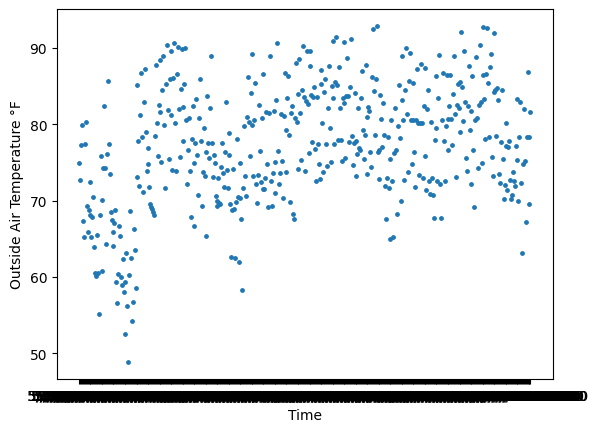

In [10]:
plt.scatter(data['Time'], data['Outside Air Temperature'], s=6)
plt.xlabel("Time")
plt.ylabel("Outside Air Temperature \N{DEGREE SIGN}F")
plt.show()

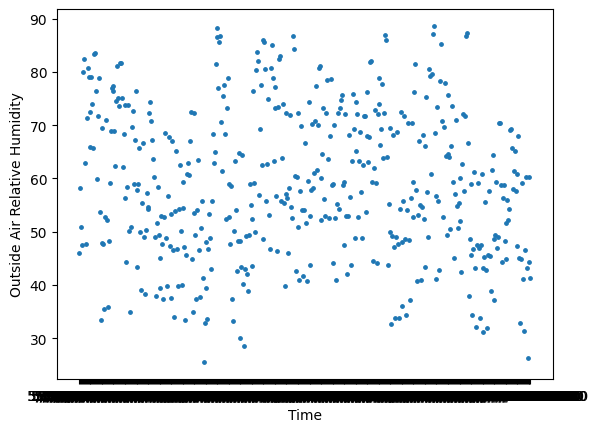

In [11]:
plt.scatter(data['Time'], data['Outside Air Relative Humidity'], s=6)
plt.xlabel("Time")
plt.ylabel("Outside Air Relative Humidity")
plt.show()

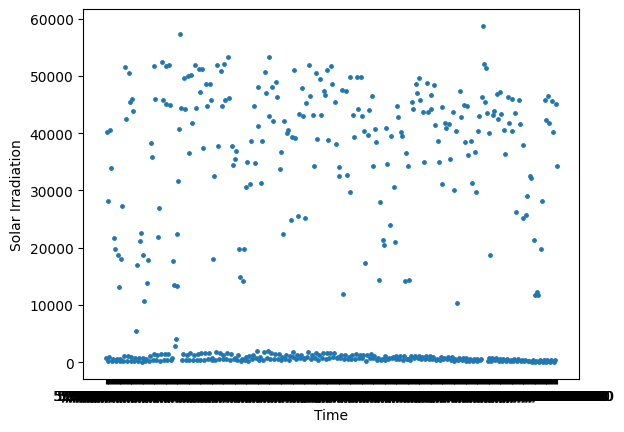

In [12]:
plt.scatter(data['Time'], data['Solar Irradiation'], s=6)
plt.xlabel("Time")
plt.ylabel("Solar Irradiation")
plt.show()

Using plt.plot() funciton to generate the same scatter plot.<br>
Note: linestyle='None' removes the lines and marker='.' shows the scattered points.<br>
To display the temperature sign, we will need to use \N{DEGREE SIGN}F.

Text(0, 0.5, 'Outside Air Temperature °F')

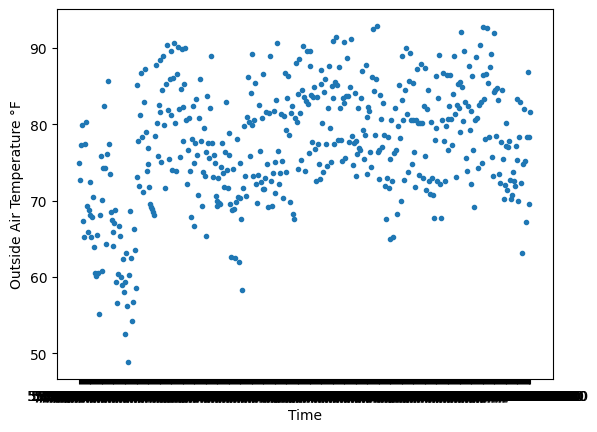

In [13]:
plt.plot(data['Time'], data['Outside Air Temperature'], linestyle='None',marker='.')
plt.xlabel("Time")
plt.ylabel("Outside Air Temperature \N{DEGREE SIGN}F")

Python has many powerful tools to allow you explore your data from calculting basic statistics to explore the data visually. Data exploration allows you to have a better sense of the data including better understanding of the features (variables), any unusal data points (outliers), and any patterns and relationship among the variables. It will allow you to better navigate and use the data for other analysis.